# 31. Building Neural Network for Regression Problem

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

## Data Set Characteristics:

#### Number of Instances:

20640

#### number of Atributes:

8 numeric, predictive attributes and the target

#### Atribute Information

+ __MedInc__: median income in block
+ __HouseAge__: median house age in block
+ __AveRooms__: average number of rooms
+ __AveBedrms__: average number of bedrooms
+ __Population__: block pupulation
+ __AveOccup__: average house occupancy
+ __Latitude__: house block latitude
+ __Longitude__: house block longitude

#### Target

The median house value in units of 100,000 for California districts

#### Documentation


https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html


In [4]:
# Show classes
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


#### Train Test Split - Documentation

Split arrays or matrices into random train and test subsets.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [5]:
from sklearn.model_selection import train_test_split

#train_test_split(DatosEntrada, SalidaEsperada, semilla)

# Separa los datos en conjunto(set) de entramiento y de comprobacion(test)
# tanto para entrada como salida esperada
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)

# Separa los datos del conjunto de entrenamiento en conjunto de entrenamiento y conjunto de validacion
# tanto para entrada como para salida esperada
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

#### Standar Scaler - Documentation

Standardize features by removing the mean and scaling to unit variance.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [6]:
from sklearn.preprocessing import StandardScaler

# We want all the variables with mean zero and their variance as one
scaler = StandardScaler() # obj

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [7]:
# Establecemos las semillas para poder reproducir otras veces los resultados
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
X_train.shape

(11610, 8)

#### Structure of our NN

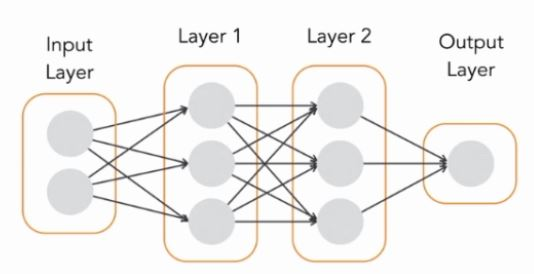

In [9]:
from IPython.display import Image
Image("../S10 - Python - Building and Trainning the Model/images/sequential_api.jpg", height=400, width=400)

In [10]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]), # tenemos 8 atributos iniciales
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

# Otra forma de poner la primera capa, la de los atributos (clases)
# keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


#### Compilar modelo - Documentacion

https://keras.io/api/models/model_training_apis/

In [12]:
model.compile(loss="mean_squared_error",             # Por usar Regresion
             optimizer=keras.optimizers.SGD(lr=1e-3),# Stocastic Gradient Descent, learning rate
             metrics=['mae'])                        # mean absolute error

C:\Users\snopv\anaconda3\envs\Udemy_NN_python\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [13]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
287/363 [======================>.......] - ETA: 0s - loss: 2.1800 - mae: 1.0773WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001ACCFC96E58> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and

In [14]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 574us/step - loss: 0.3942 - mae: 0.4502


In [15]:
model_history.history

{'loss': [1.8866397142410278,
  0.6577126979827881,
  0.593418538570404,
  0.5557191371917725,
  0.5271905064582825,
  0.5032975673675537,
  0.48535555601119995,
  0.47091811895370483,
  0.45779937505722046,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.42605164647102356,
  0.42017653584480286,
  0.41549983620643616,
  0.41116511821746826,
  0.4077068567276001,
  0.40395283699035645,
  0.4004494547843933,
  0.39796027541160583],
 'mae': [0.9900256991386414,
  0.6041509509086609,
  0.5618005990982056,
  0.5398454070091248,
  0.5237293839454651,
  0.5112563967704773,
  0.5010153651237488,
  0.492448091506958,
  0.4857262969017029,
  0.4797375202178955,
  0.4744163453578949,
  0.4703480303287506,
  0.46740883588790894,
  0.46360209584236145,
  0.461266428232193,
  0.4591343402862549,
  0.4568699896335602,
  0.4545365273952484,
  0.4521064758300781,
  0.45083147287368774],
 'val_loss': [0.7126054763793945,
  0.6880088448524475,
  0.5803285837173462,
  0.51660853624

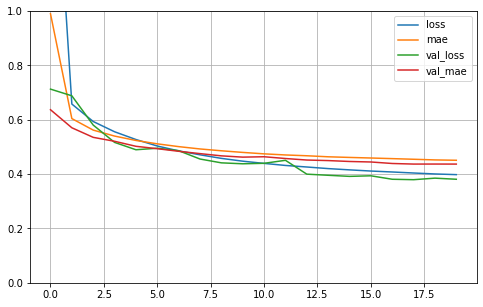

In [16]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

In [17]:
# Crear nuevos datos (como si lo fueran)
X_new = X_test[:3]

In [18]:
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:3])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[[0.53287673]
 [1.8915396 ]
 [3.4040868 ]]
[0.477   0.458   5.00001]


# 32. Using Functional API for Complex Architectures


## Functional API

Not all Neural Network models are simply sequential. 

- Some may have complex topologies.

- Some may have multiple inputs and/or multiple outputs.

For example, a __Wide and Deep Neural Network__ connects all or part of the inputs directly to de outpu layer.

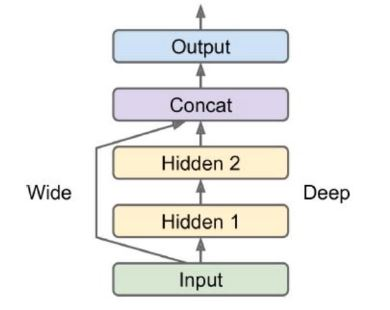

In [19]:
Image("../S12 - Complex ANN Architectures using Functional API/images/img1.jpg", height=300, width=300)

In [20]:
# Creando las capas de la red neuronal
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_) #llamada como funcion. Estas conectandolas.
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)

# Creando el modelo, indicas que quieres como entrada y salida
model = keras.models.Model(inputs=[input_], outputs=[output])

In [21]:
# Mostrar el resumen de la red
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 30)           930         ['dense_3[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_4[0][0]']            

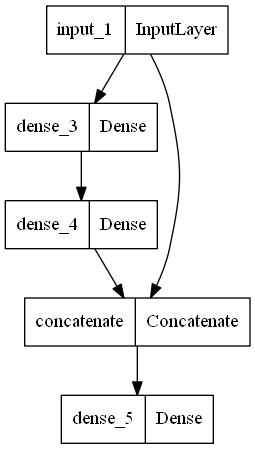

In [22]:
import pydot
from tensorflow.keras.utils import plot_model

# Visualizar la estructura de la NN
keras.utils.plot_model(model)

In [23]:
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=["mae"])

#mae = mean absolute error
#SGD = Stocastic Gradient Descent
#lr = learning rate

C:\Users\snopv\anaconda3\envs\Udemy_NN_python\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [24]:
model_history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))

Epoch 1/40
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
302/363 [=======================>......] - ETA: 0s - loss: 1.8778 - mae: 0.9451WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001ACD3FB95E8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and

In [25]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 638us/step - loss: 0.3684 - mae: 0.4314


In [26]:
model_history.history

{'loss': [1.6920058727264404,
  0.6836403608322144,
  0.6264882683753967,
  0.5877465605735779,
  0.5565560460090637,
  0.5311980247497559,
  0.5107864141464233,
  0.4951668083667755,
  0.4802228510379791,
  0.4684668779373169,
  0.4589638411998749,
  0.45022013783454895,
  0.4432655870914459,
  0.4363251030445099,
  0.4306240975856781,
  0.425344318151474,
  0.4212934672832489,
  0.41681814193725586,
  0.4126456081867218,
  0.4095861315727234,
  0.40596330165863037,
  0.4029441177845001,
  0.4000454246997833,
  0.3971883952617645,
  0.3946213722229004,
  0.39249086380004883,
  0.3904934525489807,
  0.38845276832580566,
  0.3867104947566986,
  0.38484394550323486,
  0.38295263051986694,
  0.3815838396549225,
  0.38052698969841003,
  0.3787004351615906,
  0.3775610029697418,
  0.3762996792793274,
  0.3750821352005005,
  0.3740887939929962,
  0.37281912565231323,
  0.37164339423179626],
 'mae': [0.8892966508865356,
  0.5993583798408508,
  0.577479362487793,
  0.558142364025116,
  0.54213

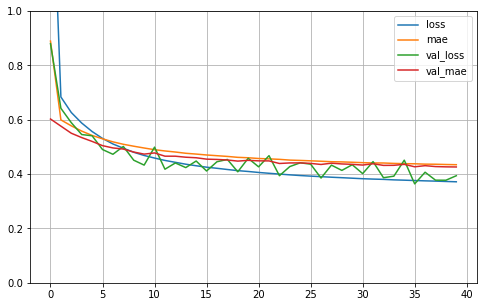

In [27]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

# 33. Saving - Restoring Models and using Callbacks

### Saving and Restoring

In [28]:
#Guardar modelo
model.save("my_func_model")
model.save("my_func_model.h5")
#%pwd # ver donde lo guardas

# Cambiar el directorio
# %cd C\\dir\\dir

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity t

In [29]:
# Eliminar modelo
#del model

In [30]:
# Limpiar la sesion de keras
keras.backend.clear_session()

In [31]:
new_model = tf.keras.models.load_model('my_func_model.h5')

In [32]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 30)           930         ['dense_3[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_4[0][0]']            

In [33]:
y_pred = new_model.predict(X_new)
print(y_pred)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[[0.7834456]
 [1.7348332]
 [3.7177854]]
